
### build Deep Learnig Structure for mnist dataset

### mnist dataset이란 ?
>  손으로 쓴 숫자들로 이루어진 데이터베이스

>  쉽게 생각하면 가벼운 데이터라 딥러닝 구조 학습에 적절함

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

## load mnist dataset
mnist = keras.datasets.mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [5]:
x_train = x_train.reshape(-1,28,28,1)

In [6]:
x_test = x_test.reshape(-1,28,28,1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

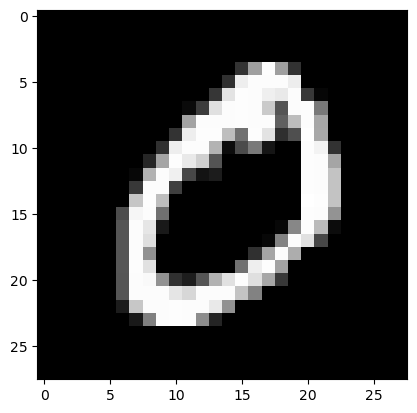

In [8]:
plt.imshow(x_train[1], cmap='gray')

### x = Feature 
### y = Target

#### 직접 신경망을 구축해보자!
> Dense, Flatten, Conv2D 계층을 사용해서 신경망을 구축하는 과정

> Dense는 일반 계층

> Flatten은 평탄화 계층

> Conv2D는 필터 계층 으로 생각하면 좋다


In [6]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input

In [7]:
model = tf.keras.Sequential()
model.add(Input(shape=(28,28,1),name="input_layers"))
model.add(Dense(32, activation='relu', name="1st_Dense_layer"))
model.add(Conv2D(filters=16, padding="same", kernel_size=(3,3), activation='relu'))
model.add(Dense(16, activation="relu", name="2nd_Dense_layer"))
model.add(Flatten())
model.add(Dense (8, activation='relu', name="last_Dense_layer"))
model.add(Dense(10, activation="softmax", name="output"))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train, epochs=10, validation_split=.25)

In [ ]:
pred = model.predict(x_test)

In [ ]:
eva = model.evaluate(x_test, y_test)

In [ ]:
eva